In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/psl-season-9-complete-dataset-2024/PSL_Season_09_dataset.csv


## Context
The Pakistan Super League (PSL) is a premier professional men's Twenty20 cricket league, contested annually by six city-based franchises representing various regions of Pakistan. Established in 2015 by the Pakistan Cricket Board (PCB), the PSL operates as a single entity, with teams owned and controlled by their investors. The league follows a double round-robin format, leading to playoffs and culminating in a highly-anticipated final. Known for its competitive matches and featuring a mix of local and international talent, the PSL has become a significant event in the cricket calendar.

## Content
Season 9 of the Pakistan Super League (PSL) was a thrilling cricketing spectacle that ran from February 17 to March 18, 2024. Hosted across four cities in Pakistan, the tournament featured 34 matches showcasing a blend of local and international cricketing talent. Islamabad United clinched their third title by defeating Multan Sultans in a nail-biting final, while players like Babar Azam and Usama Mir made headlines with their outstanding performances.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("umerhaddii/psl-season-9-complete-dataset-2024")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/psl-season-9-complete-dataset-2024


In [4]:
df = pd.read_csv("/kaggle/input/psl-season-9-complete-dataset-2024/PSL_Season_09_dataset.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,1.5,Lahore Qalandars,Islamabad United,Sahibzada Farhan,Fakhar Zaman,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,1.6,Lahore Qalandars,Islamabad United,Sahibzada Farhan,Fakhar Zaman,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.1,Lahore Qalandars,Islamabad United,Fakhar Zaman,Sahibzada Farhan,...,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.2,Lahore Qalandars,Islamabad United,Fakhar Zaman,Sahibzada Farhan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.3,Lahore Qalandars,Islamabad United,Sahibzada Farhan,Fakhar Zaman,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data preprocessing

In [5]:
df.shape


(7795, 22)

In [6]:
df.columns.T

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7795 entries, 0 to 7794
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                7795 non-null   int64  
 1   season                  7795 non-null   object 
 2   start_date              7795 non-null   object 
 3   venue                   7795 non-null   object 
 4   innings                 7795 non-null   int64  
 5   ball                    7795 non-null   float64
 6   batting_team            7795 non-null   object 
 7   bowling_team            7795 non-null   object 
 8   striker                 7795 non-null   object 
 9   non_striker             7795 non-null   object 
 10  bowler                  7795 non-null   object 
 11  runs_off_bat            7795 non-null   int64  
 12  extras                  7795 non-null   int64  
 13  wides                   288 non-null    float64
 14  noballs                 23 non-null     

In [8]:
df.isnull().sum()/len(df)*100

match_id                    0.000000
season                      0.000000
start_date                  0.000000
venue                       0.000000
innings                     0.000000
ball                        0.000000
batting_team                0.000000
bowling_team                0.000000
striker                     0.000000
non_striker                 0.000000
bowler                      0.000000
runs_off_bat                0.000000
extras                      0.000000
wides                      96.305324
noballs                    99.704939
byes                       99.794740
legbyes                    98.255292
penalty                    99.987171
wicket_type                94.830019
player_dismissed           94.830019
other_wicket_type         100.000000
other_player_dismissed    100.000000
dtype: float64

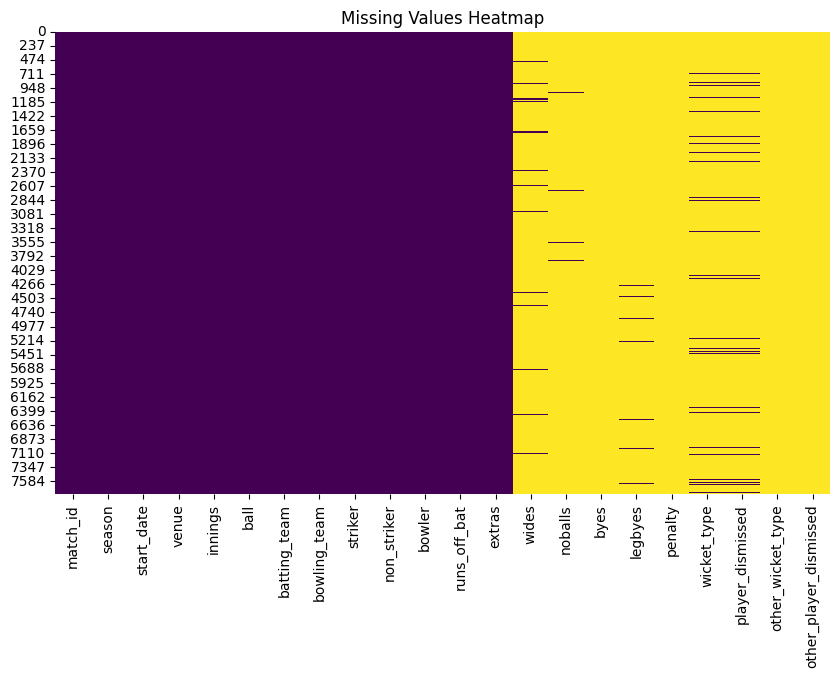

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

Why i am removing missing values because if our deal 40/50% missing values then our model performnace will very low. so, i will remove missing values above 40%

In [10]:
df.drop(['wides','noballs','byes','legbyes','penalty','player_dismissed',
        'other_player_dismissed'],axis=1,inplace=True)

df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

# Visualization
## visualize top innins team

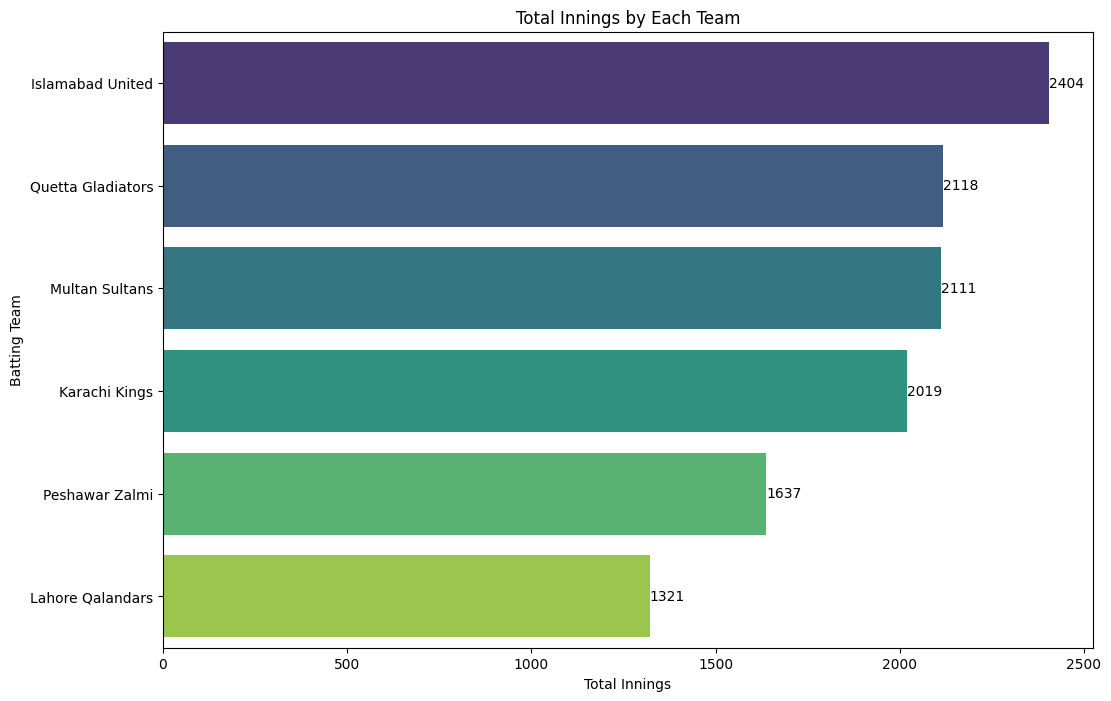

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total runs scored by each team
total_runs = df.groupby('batting_team')['innings'].sum().reset_index()

# Sort the teams by total runs in descending order
total_runs = total_runs.sort_values(by='innings', ascending=False)

# Plot the total runs scored by each team
plt.figure(figsize=(12, 8))
sns.barplot(x='innings', y='batting_team', data=total_runs, palette='viridis')
plt.title('Total Innings by Each Team')
plt.xlabel('Total Innings')
plt.ylabel('Batting Team')

# Annotate bars with values
for index, value in enumerate(total_runs['innings']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.show()

# Calculate total runs scored by each team?

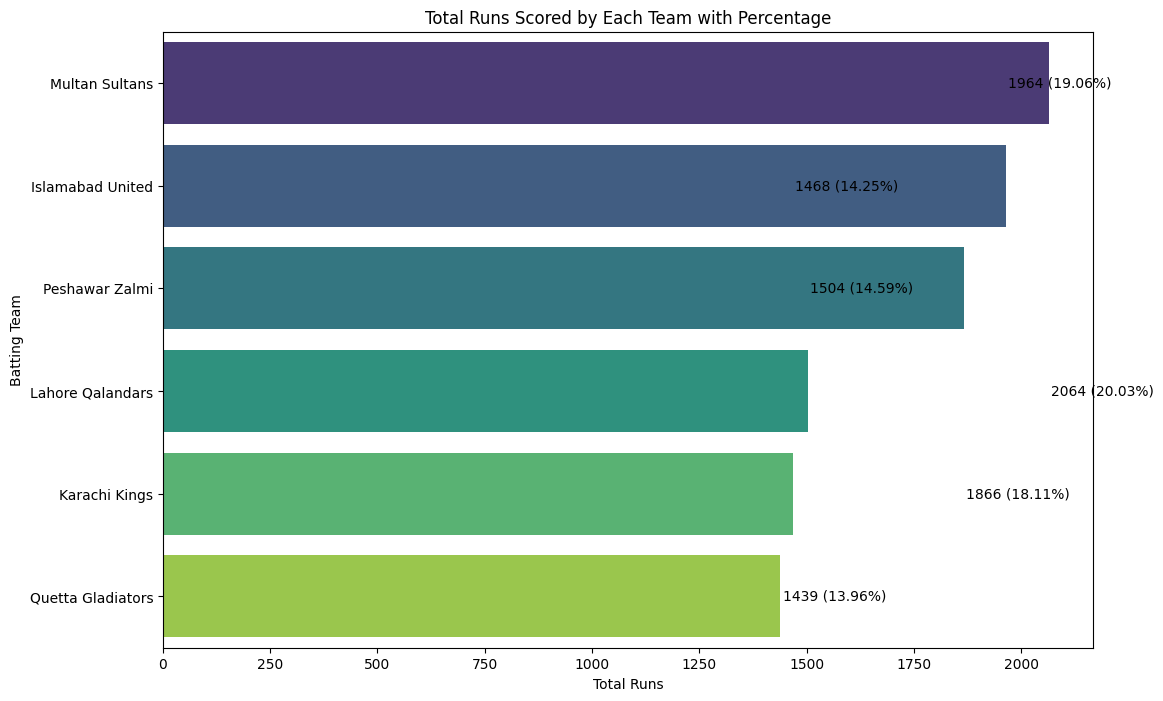

In [12]:
total_runs = df.groupby('batting_team')['runs_off_bat'].sum().reset_index()

# Calculate percentage of total runs
total_runs['percentage'] = (total_runs['runs_off_bat'] / total_runs['runs_off_bat'].sum()) * 100

# Sort the teams by total runs in descending order
total_runs = total_runs.sort_values(by='runs_off_bat', ascending=False)

# Plot the total runs scored by each team with percentages
plt.figure(figsize=(12, 8))
sns.barplot(x='runs_off_bat', y='batting_team', data=total_runs, palette='viridis')
for index, row in total_runs.iterrows():
    plt.text(row['runs_off_bat'] + 5, index, f'{row["runs_off_bat"]} ({row["percentage"]:.2f}%)', va='center', ha='left', color='black')
plt.title('Total Runs Scored by Each Team with Percentage')
plt.xlabel('Total Runs')
plt.ylabel('Batting Team')
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7795 entries, 0 to 7794
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   match_id           7795 non-null   int64         
 1   season             7795 non-null   object        
 2   start_date         7795 non-null   datetime64[ns]
 3   venue              7795 non-null   object        
 4   innings            7795 non-null   int64         
 5   ball               7795 non-null   float64       
 6   batting_team       7795 non-null   object        
 7   bowling_team       7795 non-null   object        
 8   striker            7795 non-null   object        
 9   non_striker        7795 non-null   object        
 10  bowler             7795 non-null   object        
 11  runs_off_bat       7795 non-null   int64         
 12  extras             7795 non-null   int64         
 13  wicket_type        403 non-null    object        
 14  other_wi

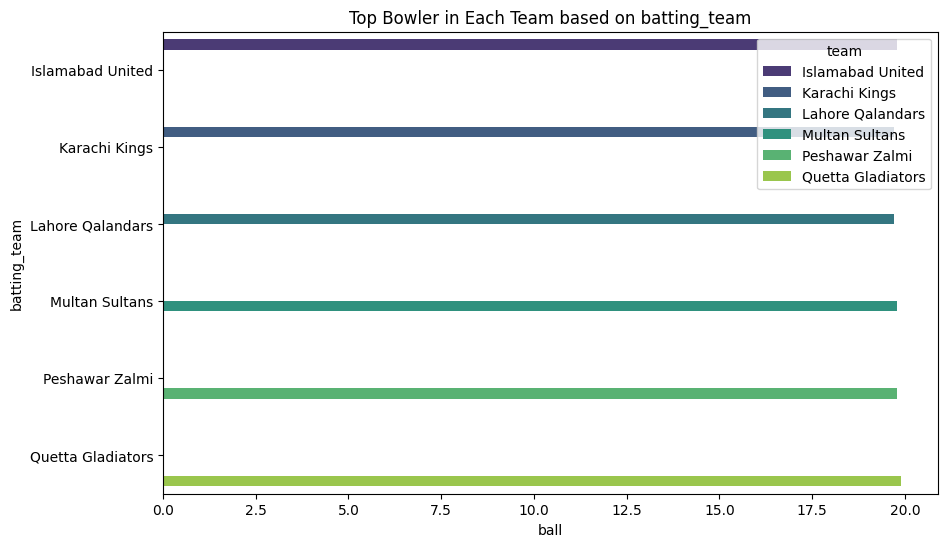

In [14]:
# Identify top bowler in each team
top_bowlers = df.loc[df.groupby('bowling_team')['ball'].idxmax()]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='ball', y='bowling_team', hue='bowling_team', data=top_bowlers, palette='viridis')
plt.title('Top Bowler in Each Team based on batting_team')
plt.xlabel('ball')
plt.ylabel('batting_team')
plt.legend(title='team')
plt.show()

# select top 5 battsman runrat

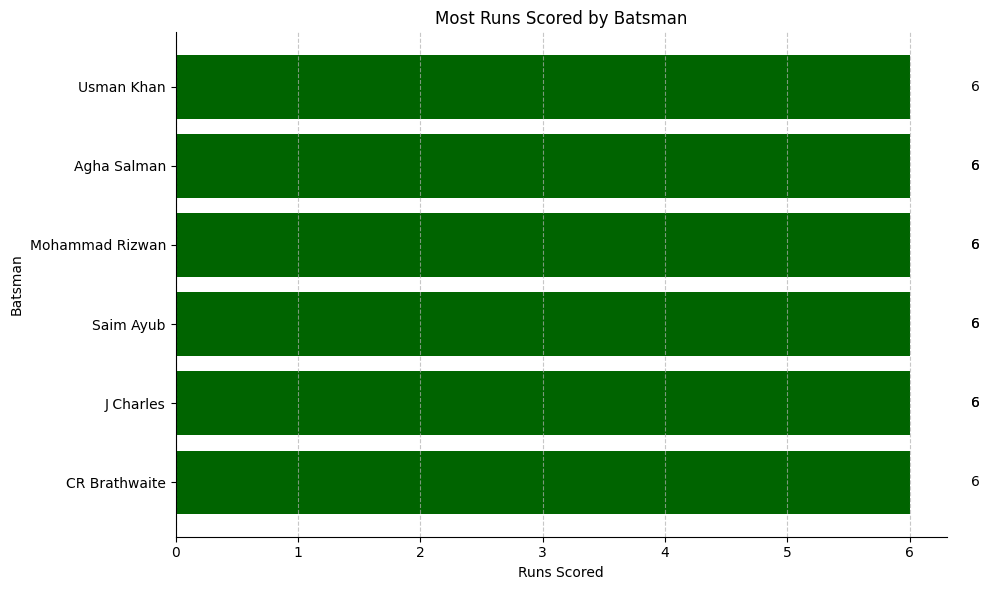

In [15]:
import matplotlib.pyplot as plt

# Data (example)
top10batters = df.sort_values(by='runs_off_bat', ascending=False).head(10)

# Matplotlib bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top10batters['striker'], top10batters['runs_off_bat'], color='darkgreen')

# Add labels and titles
plt.xlabel('Runs Scored')
plt.ylabel('Batsman')
plt.title('Most Runs Scored by Batsman')

# Invert y-axis to match Plotly's horizontal orientation
plt.gca().invert_yaxis()

# Show values on bars
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}', 
             va='center', ha='left', color='black')

# Adjust layout and aesthetics
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [16]:
# Find the batsman with the highest runs_off_bat
top_batsman = df.loc[df['runs_off_bat'].idxmax()]

# Display the result
print(f"Top batsman: {top_batsman['striker']} with {top_batsman['runs_off_bat']} runs")

Top batsman: Sahibzada Farhan with 6 runs


In [17]:
# Assuming 'wickets' is a column indicating the number of wickets taken by each bowler
top_bowler = df.loc[df['striker'].idxmax()]

# Display the top bowler and their wickets taken
print(f"Top bowler: {top_bowler['bowler']} with {top_bowler['striker']} striker")

Top bowler: Usama Mir with Zaman Khan striker


In [18]:
# Assuming 'wickets' is a column indicating the number of wickets taken by each bowler
top_bowler = df.loc[df['non_striker'].idxmax()]

# Display the top bowler and their wickets taken
print(f"Top bowler: {top_bowler['bowler']} with {top_bowler['non_striker']} non_striker")

Top bowler: Usama Mir with Zaman Khan non_striker


# which player take high innings

In [19]:
# Assuming 'wickets' is a column indicating the number of wickets taken by each bowler
top_bowler = df.loc[df['innings'].idxmax()]

# Display the top bowler and their wickets taken
print(f"Top bowler: {top_bowler['bowler']} with {top_bowler['innings']} innings")

Top bowler: Shaheen Shah Afridi with 2 innings


## check unique values

In [20]:
ball = df[df['ball'].notna()]
print(ball['start_date'].value_counts())
print("_____________________________________")
print(df['venue'].value_counts())
print("_____________________________________")
print(df['innings'].value_counts())
print("_____________________________________")
print(df['bowling_team'].value_counts())
print("_____________________________________")
print(df['batting_team'].value_counts())
print("_____________________________________")
print(df['striker'].value_counts())
print("_____________________________________")
print(df['non_striker'].value_counts())
print("_____________________________________")
print(df['bowler'].value_counts())
print("_____________________________________")
print(df['extras'].value_counts())
print("_____________________________________")

start_date
2024-02-18    509
2024-02-25    506
2024-03-10    496
2024-02-21    479
2024-03-06    460
2024-03-05    258
2024-02-23    254
2024-02-20    252
2024-02-19    249
2024-03-09    249
2024-03-11    248
2024-03-04    248
2024-02-29    247
2024-03-18    246
2024-02-24    246
2024-03-16    244
2024-03-03    243
2024-03-07    242
2024-02-26    242
2024-02-28    241
2024-03-15    239
2024-03-08    237
2024-02-22    237
2024-03-14    236
2024-02-17    233
2024-02-27    230
2024-03-12    224
Name: count, dtype: int64
_____________________________________
venue
National Stadium, Karachi     2665
Gaddafi Stadium, Lahore       2176
Rawalpindi Cricket Stadium    1693
Multan Cricket Stadium        1261
Name: count, dtype: int64
_____________________________________
innings
1    3980
2    3815
Name: count, dtype: int64
_____________________________________
bowling_team
Islamabad United     1469
Multan Sultans       1453
Peshawar Zalmi       1324
Quetta Gladiators    1221
Karachi Kings       

## Group by match_id and venue to get unique matches

In [21]:
unique_matches = df.drop_duplicates(subset=['match_id', 'venue'])

# Count the occurrences of each venue
venue_counts = unique_matches['venue'].value_counts().reset_index()
venue_counts

,venue,count
0,"National Stadium, Karachi",11
1,"Gaddafi Stadium, Lahore",9
2,Rawalpindi Cricket Stadium,7
3,Multan Cricket Stadium,5


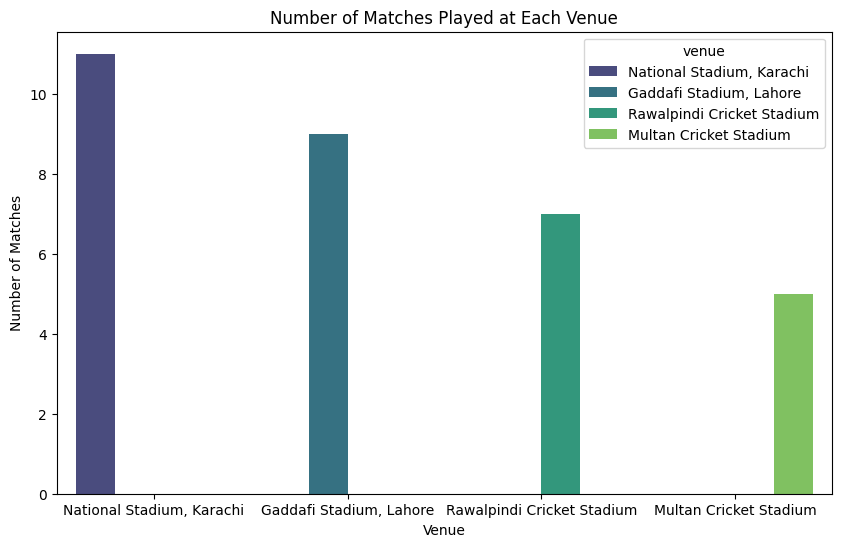

In [22]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='venue',y='count', hue='venue', data=venue_counts, palette='viridis')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
#plt.xticks(rotation=45)
plt.title('Number of Matches Played at Each Venue')
plt.show()

# 📓 Your feedback will be important as I try more advanced techniques.🚀